In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
import pandas.testing as tm
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
movie_df = pd.read_csv('rating.csv')

In [5]:
movie_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
title = pd.read_csv('movie.csv')

In [7]:
title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movie_df = pd.merge(movie_df,title,on = 'movieId')

In [10]:
movie_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [16]:
movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Codes of Gender, The (2010)               5.0
Poison (1951)                             5.0
Barchester Chronicles, The (1982)         5.0
Prom Queen: The Marc Hall Story (2004)    5.0
Argentina latente (2007)                  5.0
Name: rating, dtype: float64

In [17]:
movie_df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [18]:
ratings = DataFrame(movie_df.groupby('title')['rating'].mean())

In [20]:
ratings['num of ratings'] = DataFrame(movie_df.groupby('title')['rating'].count())

In [21]:
ratings.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55
$ellebrity (Sellebrity) (2012),2.000000,2


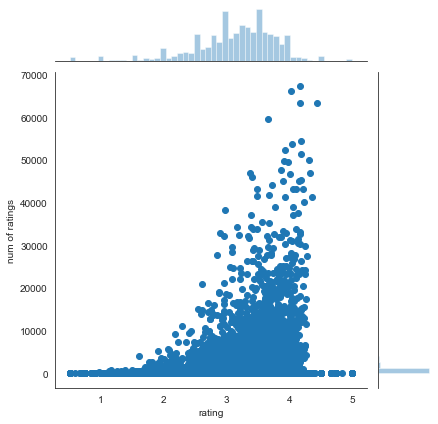

In [22]:
sns.jointplot(ratings['rating'],ratings['num of ratings'],)

In [24]:
movie_mat = movie_df.pivot_table(index='userId',columns='title',values='rating')

ValueError: Unstacked DataFrame is too big, causing int32 overflow

In [ ]:
movie